# Spotify Mini Project V1, K=6

In [135]:
import config

In [136]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [137]:
import spotipy
import pandas as pd
import numpy as np

import json
from spotipy.oauth2 import SpotifyClientCredentials

#Initialize SpotiPy with user credentials
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id= config.client_id,
                                                           client_secret= config.client_secret))


results = sp.search(q="daddy cool",limit=5,market="GB")
results

{'tracks': {'href': 'https://api.spotify.com/v1/search?offset=0&limit=5&query=daddy%20cool&type=track&market=GB',
  'limit': 5,
  'next': 'https://api.spotify.com/v1/search?offset=5&limit=5&query=daddy%20cool&type=track&market=GB',
  'offset': 0,
  'previous': None,
  'total': 985,
  'items': [{'album': {'album_type': 'album',
     'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/54R6Y0I7jGUCveDTtI21nb'},
       'href': 'https://api.spotify.com/v1/artists/54R6Y0I7jGUCveDTtI21nb',
       'id': '54R6Y0I7jGUCveDTtI21nb',
       'name': 'Boney M.',
       'type': 'artist',
       'uri': 'spotify:artist:54R6Y0I7jGUCveDTtI21nb'}],
     'external_urls': {'spotify': 'https://open.spotify.com/album/1KQUrny9y5zGpktF6hAGd4'},
     'href': 'https://api.spotify.com/v1/albums/1KQUrny9y5zGpktF6hAGd4',
     'id': '1KQUrny9y5zGpktF6hAGd4',
     'images': [{'height': 640,
       'width': 640,
       'url': 'https://i.scdn.co/image/ab67616d0000b273dafd1cd6e9537ec8463ea691'},
   

# 1. Scrape the Most Popular Songs Right Now on Billboard Hot 100

In [3]:
# Scrape the Billboard Hot 100 (Billboard Charts) to collect the top 100 songs and respective artists.
# Store this in a DataFrame with the columns:
# "song_title" and "artist"
# These songs will form a "Trending" category that users can choose from.

In [138]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import random

In [139]:
url = "https://www.billboard.com/charts/hot-100/"

In [140]:
response = requests.get(url)

In [141]:
soup = BeautifulSoup(response.content)

In [8]:
soup

<!DOCTYPE html>
<!--[if IE 6]>
<html id="ie6" lang="en-US">
<![endif]--><!--[if IE 7]>
<html id="ie7" lang="en-US">
<![endif]--><!--[if IE 8]>
<html id="ie8" lang="en-US">
<![endif]--><!--[if !(IE 6) | !(IE 7) | !(IE 8) ]><!--><html lang="en-US">
<!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<meta content="#ffffff" name="theme-color"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<!-- Add to home screen for iOS -->
<meta content="black-translucent" name="apple-mobile-web-app-status-bar-style"/>
<link href="https://www.billboard.com/wp-content/themes/vip/pmc-billboard-2021/assets/app/icons/apple-touch-icon.png" rel="apple-touch-icon" sizes="180x180"/>
<!-- Tile icons for Windows -->
<meta content="https://www.billboard.com/wp-content/themes/vip/pmc-billboard-2021/assets/app/browserconfig.xml" name="msapplication-config"/>
<meta content="https://www.billboard.com/wp-content/themes/vip/pmc-billboa

In [142]:
len(soup.find_all("h3", class_ = "u-max-width-397"))

100

In [143]:
soup.find_all("h3", class_ = "u-max-width-397")

[<h3 class="c-title a-font-basic u-letter-spacing-0010 u-max-width-397 lrv-u-font-size-16 lrv-u-font-size-14@mobile-max u-line-height-22px u-word-spacing-0063 u-line-height-normal@mobile-max a-truncate-ellipsis-2line lrv-u-margin-b-025 lrv-u-margin-b-00@mobile-max" id="title-of-a-story">
 
 	
 	
 		
 					Golden		
 	
 </h3>,
 <h3 class="c-title a-font-basic u-letter-spacing-0010 u-max-width-397 lrv-u-font-size-16 lrv-u-font-size-14@mobile-max u-line-height-22px u-word-spacing-0063 u-line-height-normal@mobile-max a-truncate-ellipsis-2line lrv-u-margin-b-025 lrv-u-margin-b-00@mobile-max" id="title-of-a-story">
 
 	
 	
 		
 					Ordinary		
 	
 </h3>,
 <h3 class="c-title a-font-basic u-letter-spacing-0010 u-max-width-397 lrv-u-font-size-16 lrv-u-font-size-14@mobile-max u-line-height-22px u-word-spacing-0063 u-line-height-normal@mobile-max a-truncate-ellipsis-2line lrv-u-margin-b-025 lrv-u-margin-b-00@mobile-max" id="title-of-a-story">
 
 	
 	
 		
 					Soda Pop		
 	
 </h3>,
 <h3 class="c-t

In [144]:
song_title = []
for song in soup.select("h3.u-max-width-397"):
    song_title.append(song.get_text().strip())

In [145]:
song_title

['Golden',
 'Ordinary',
 'Soda Pop',
 'What I Want',
 'Your Idol',
 'Manchild',
 'Lose Control',
 'Daisies',
 'Love Me Not',
 'Die With A Smile',
 'I Got Better',
 'Mutt',
 "How It's Done",
 'Beautiful Things',
 'A Bar Song (Tipsy)',
 'Undressed',
 'Tears',
 'Just In Case',
 'Pink Pony Club',
 'Good News',
 'What It Sounds Like',
 'Folded',
 'Back To Friends',
 "I'm The Problem",
 'Man I Need',
 'Safe',
 'Mystical Magical',
 'Luther',
 'Takedown',
 'Free',
 'It Depends',
 'When Did You Get Hot?',
 'Bottle Rockets',
 'Burning Blue',
 'Yukon',
 'All The Way',
 'Magnet',
 'Romantic Homicide',
 "Sorry I'm Here For Someone Else",
 'Happen To Me',
 'No Broke Boys',
 'Outside',
 'Pretty & Petty',
 'Bar None',
 'Pick It Up',
 'Hello',
 'Dead',
 '12 To 12',
 'Hell At Night',
 'Worst Way',
 "Nobody's Son",
 'Revolving Door',
 'Bodega Baddie',
 'Back In The Saddle',
 'Sugar On My Tongue',
 'Gabriela',
 'Jealous Type',
 'House Again',
 'Somewhere Over Laredo',
 'The Dead Dance',
 'Wildflower',
 '6

In [146]:
len(soup.find_all("span", class_ = "a-no-trucate"))

100

c-label a-no-trucate
							a-font-secondary u-font-size-15 u-font-size-13@mobile-max u-line-height-18px@mobile-max u-letter-spacing-0010 u-line-height-21px
							a-children-link-color-black a-children-link-color-brand-secondary:hover
							lrv-a-children-link-decoration-underline:hover
							lrv-u-display-block a-truncate-ellipsis-2line u-max-width-397 u-max-width-230@tablet-only u-max-width-300@mobile-max
						

In [147]:
soup.find_all("span", class_ = "a-no-trucate")

[<span class="c-label a-no-trucate a-font-secondary u-font-size-15 u-font-size-13@mobile-max u-line-height-18px@mobile-max u-letter-spacing-0010 u-line-height-21px a-children-link-color-black a-children-link-color-brand-secondary:hover lrv-a-children-link-decoration-underline:hover lrv-u-display-block a-truncate-ellipsis-2line u-max-width-397 u-max-width-230@tablet-only u-max-width-300@mobile-max">
 							HUNTR/X: EJAE, Audrey Nuna &amp; REI AMI						</span>,
 <span class="c-label a-no-trucate a-font-secondary u-font-size-15 u-font-size-13@mobile-max u-line-height-18px@mobile-max u-letter-spacing-0010 u-line-height-21px a-children-link-color-black a-children-link-color-brand-secondary:hover lrv-a-children-link-decoration-underline:hover lrv-u-display-block a-truncate-ellipsis-2line u-max-width-397 u-max-width-230@tablet-only u-max-width-300@mobile-max">
 <a href="https://www.billboard.com/artist/alex-warren/">Alex Warren</a> </span>,
 <span class="c-label a-no-trucate a-font-secondary

In [148]:
artist_name = []
for artist in soup.select("span.a-no-trucate"):
    artist_name.append(artist.get_text().strip())

In [149]:
artist_name

['HUNTR/X: EJAE, Audrey Nuna & REI AMI',
 'Alex Warren',
 'Saja Boys: Andrew Choi, Neckwav, Danny Chung, Kevin Woo & samUIL Lee',
 'Morgan Wallen Featuring Tate McRae',
 'Saja Boys: Andrew Choi, Neckwav, Danny Chung, Kevin Woo & samUIL Lee',
 'Sabrina Carpenter',
 'Teddy Swims',
 'Justin Bieber',
 'Ravyn Lenae',
 'Lady Gaga & Bruno Mars',
 'Morgan Wallen',
 'Leon Thomas',
 'HUNTR/X: EJAE, Audrey Nuna & REI AMI',
 'Benson Boone',
 'Shaboozey',
 'sombr',
 'Sabrina Carpenter',
 'Morgan Wallen',
 'Chappell Roan',
 'Shaboozey',
 'HUNTR/X: EJAE, Audrey Nuna & REI AMI',
 'Kehlani',
 'sombr',
 'Morgan Wallen',
 'Olivia Dean',
 'Cardi B Featuring Kehlani',
 'Benson Boone',
 'Kendrick Lamar & SZA',
 'HUNTR/X: EJAE, Audrey Nuna & REI AMI',
 'Rumi, JINU, EJAE & Andrew Choi',
 'Chris Brown Featuring Bryson Tiller',
 'Sabrina Carpenter',
 'Scotty McCreery & Hootie & The Blowfish',
 'Mariah the Scientist',
 'Justin Bieber',
 'BigXthaPlug Featuring Bailey Zimmerman',
 'Cardi B',
 'd4vd',
 'Benson Boon

In [150]:
billboard_hot_100_df = pd.DataFrame({"song_title": song_title, "artist": artist_name})
billboard_hot_100_df

,song_title,artist
0,Golden,"HUNTR/X: EJAE, Audrey Nuna & REI AMI"
1,Ordinary,Alex Warren
2,Soda Pop,"Saja Boys: Andrew Choi, Neckwav, Danny Chung, ..."
3,What I Want,Morgan Wallen Featuring Tate McRae
4,Your Idol,"Saja Boys: Andrew Choi, Neckwav, Danny Chung, ..."
...,...,...
95,Which One,Drake & Central Cee
96,Goodbye,Sabrina Carpenter
97,Darlin',Chase Matthew
98,Went Legit,G Herbo


In [151]:
from IPython.display import IFrame
def play_song(track_id):
    return IFrame(src="https://open.spotify.com/embed/track/"+track_id,
       width="320",
       height="80",
       frameborder="0",
       allowtransparency="true",
       allow="encrypted-media",
      )

In [152]:
def recommend_song():  
    song_choice = input("Do you want a trending song? Please enter yes or no")
    if song_choice.lower() == "yes":
        recommendation = random.choice(billboard_hot_100_df.index)
        song = billboard_hot_100_df.loc[recommendation, 'song_title']
        artist = billboard_hot_100_df.loc[recommendation, 'artist']
        results=sp.search(q=song,type ="track",limit=5,market="GB")
        track_id = results["tracks"]["items"][0]["id"] 
        print("your trending song is: " ,song)
        print("your trending artist is: " ,artist)
        

        # song_name = results["tracks"]["items"][0]["name"]
        # artist = results["tracks"]["items"][0]["artists"][0]["name"] 
        # print("your trending song is: " ,song_name)
        # print("your trending artist is: " ,artist)
        # the above takes it from the spotify api and not the dataframe
        return(play_song(track_id))
             
    else:
        return print("we're still working on it")

        # for this else part, do a loop where it goes through each cluster/label and plays a sample from that song

In [153]:
recommend_song()

Do you want a trending song? Please enter yes or no yes


your trending song is:  Daisies
your trending artist is:  Justin Bieber


In [ ]:
# better to do return with a function
# display is the same thing but not within a function

# Spotify Audio Features

In [178]:
audio_features = pd.read_csv('audio_features_dataset_curated.csv')

In [179]:
audio_features

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5
42996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4
42997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4
42998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4


In [180]:
audio_features.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,43000.000000,4.300000e+04,43000.000000,43000.000000,43000.000000,43000.000000,43000.000000,43000.000000,43000.000000,43000.000000,43000.000000,43000.000000,43000.000000,43000.000000
mean,34.185953,2.308603e+05,0.575395,0.632784,5.346023,-7.915923,0.645512,0.071418,0.299402,0.118132,0.196259,0.482026,121.216687,3.910814
std,25.826649,9.285463e+04,0.166243,0.241942,3.559531,4.712412,0.478364,0.072019,0.322864,0.276817,0.172004,0.251098,29.360603,0.392699
min,0.000000,0.000000e+00,0.000000,0.000020,0.000000,-43.043000,0.000000,0.000000,0.000001,0.000000,0.009860,0.000000,0.000000,0.000000
25%,1.000000,1.811060e+05,0.465000,0.475000,2.000000,-9.400000,0.000000,0.034300,0.022000,0.000000,0.096200,0.275000,97.937000,4.000000
50%,39.000000,2.168035e+05,0.587000,0.674000,6.000000,-6.749000,1.000000,0.045500,0.155000,0.000016,0.125000,0.472000,121.390500,4.000000
75%,54.000000,2.613592e+05,0.700000,0.832000,8.000000,-4.942000,1.000000,0.073700,0.546000,0.006942,0.242000,0.684000,139.950000,4.000000
max,100.000000,3.601693e+06,0.975000,1.000000,11.000000,1.821000,1.000000,0.924000,0.996000,1.000000,0.994000,0.995000,243.372000,5.000000


In [181]:
audio_features.dtypes.value_counts()

float64    9
int64      5
object     4
bool       1
Name: count, dtype: int64

In [182]:
audio_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43000 entries, 0 to 42999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          43000 non-null  object 
 1   artists           42999 non-null  object 
 2   album_name        42999 non-null  object 
 3   track_name        42999 non-null  object 
 4   popularity        43000 non-null  int64  
 5   duration_ms       43000 non-null  int64  
 6   explicit          43000 non-null  bool   
 7   danceability      43000 non-null  float64
 8   energy            43000 non-null  float64
 9   key               43000 non-null  int64  
 10  loudness          43000 non-null  float64
 11  mode              43000 non-null  int64  
 12  speechiness       43000 non-null  float64
 13  acousticness      43000 non-null  float64
 14  instrumentalness  43000 non-null  float64
 15  liveness          43000 non-null  float64
 16  valence           43000 non-null  float6

In [183]:
audio_features.columns

Index(['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature'],
      dtype='object')

In [184]:
audio_features.isnull().sum()

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
dtype: int64

In [185]:
audio_features.duplicated().sum()

np.int64(8277)

In [186]:
audio_features_no_dupes = audio_features.drop_duplicates()

In [187]:
audio_features_no_dupes

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5
42996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4
42997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4
42998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4


In [ ]:
# remove outliers
# then scale with min/max scaler
# look for an elbow and highest silhouette score, see if they overlap at some point.
# 3 / 4 clusters maybe too vague 
# need more clusters for thousands of songs
# but not 100 + as need to label then
# can still do correlation, and maybe drop the feature that doesn't have the most information or what I think is less useful to recommending songs.

# streamlit: give the user the choice of what type of song do they want to listen to?
# trending and all the other clusters that you've labelled. Instrumental, upbeat jazz, high energy rock, danceable pop, chilled. 
# drop down / button
# user picks one and gets at least one or 2 recommendations, can use the spotify api,

In [ ]:
# recommend trying to set up the program so you can already test the clusters
# temporary loop goes throuh the clusters that displays a couple of songs
# or use the recommender directly, add the cluster column to the dataframe
# print one wine from all the different clusters

# like the wine e.g.
# for cluster in range(12):
    # print(wine_df.loc[wine_df["cluster"]==cluster].sample())

# work with your own recommender so it gives you 2 or 3 samples from your clusters, testing it with your actual program e.g. input cluster number and listen to the samples


In [174]:
cols=['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature']

In [188]:
# Remove outliers
# Select only continuous numeric features

# Remove outliers
lower_bounds = []
upper_bounds = []
for col in audio_features_no_dupes.select_dtypes(include = "number").columns:
    Q1 = audio_features_no_dupes[col].quantile(0.25)
    Q3 = audio_features_no_dupes[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    lower_bounds.append(lower_bound)
    upper_bound = Q3 + 1.5 * IQR
    upper_bounds.append(upper_bound)
for ind, col in enumerate(list(audio_features_no_dupes.select_dtypes(include = "number").columns)):
    X = audio_features_no_dupes[(audio_features_no_dupes[col] >= lower_bounds[ind]) & (audio_features_no_dupes[col] <= upper_bounds[ind])]


In [192]:
X

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.461,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.166,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.359,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.443,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4
5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240,False,0.688,0.481,6,-8.807,1,0.1050,0.2890,0.000000,0.1890,0.666,98.017,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42992,3FjOBB4EyIXHYUtSgrIdY9,Jesus Culture,Revelation Songs,Your Love Never Fails,38,312566,False,0.475,0.860,10,-4.722,1,0.0421,0.0065,0.000002,0.2460,0.427,113.949,4
42996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.117,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.035,85.239,4
42997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.329,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.743,132.378,4
42998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.506,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.413,135.960,4


In [189]:
audio_features_no_dupes

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5
42996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4
42997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4
42998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4


In [170]:
upper_bounds

[np.float64(108.0),
 np.float64(387818.75),
 np.float64(1.0465),
 np.float64(1.3914999999999997),
 np.float64(1.8347500000000005),
 np.float64(0.13035),
 np.float64(1.42795),
 np.float64(0.0315),
 np.float64(0.45819999999999994),
 np.float64(1.2925),
 np.float64(202.92950000000002)]

In [ ]:
# X_no_outliers=drop_outliers_iqr(audio_features_no_dupes, cols, k=1.5)

In [114]:
# def drop_outliers_iqr(audio_features_no_dupes, cols, k=1.5):
    # X = audio_features_no_dupes[cols]
    # Q1 = X.quantile(0.25)
    # Q3 = X.quantile(0.75)
    # IQR = Q3 - Q1
    # mask = ~((X < (Q1 - k*IQR)) | (X > (Q3 + k*IQR))).any(axis=1)
    # return audio_features_no_dupes[mask]

In [106]:
print(audio_features_no_dupes[cols].dtypes)

track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
dtype: object


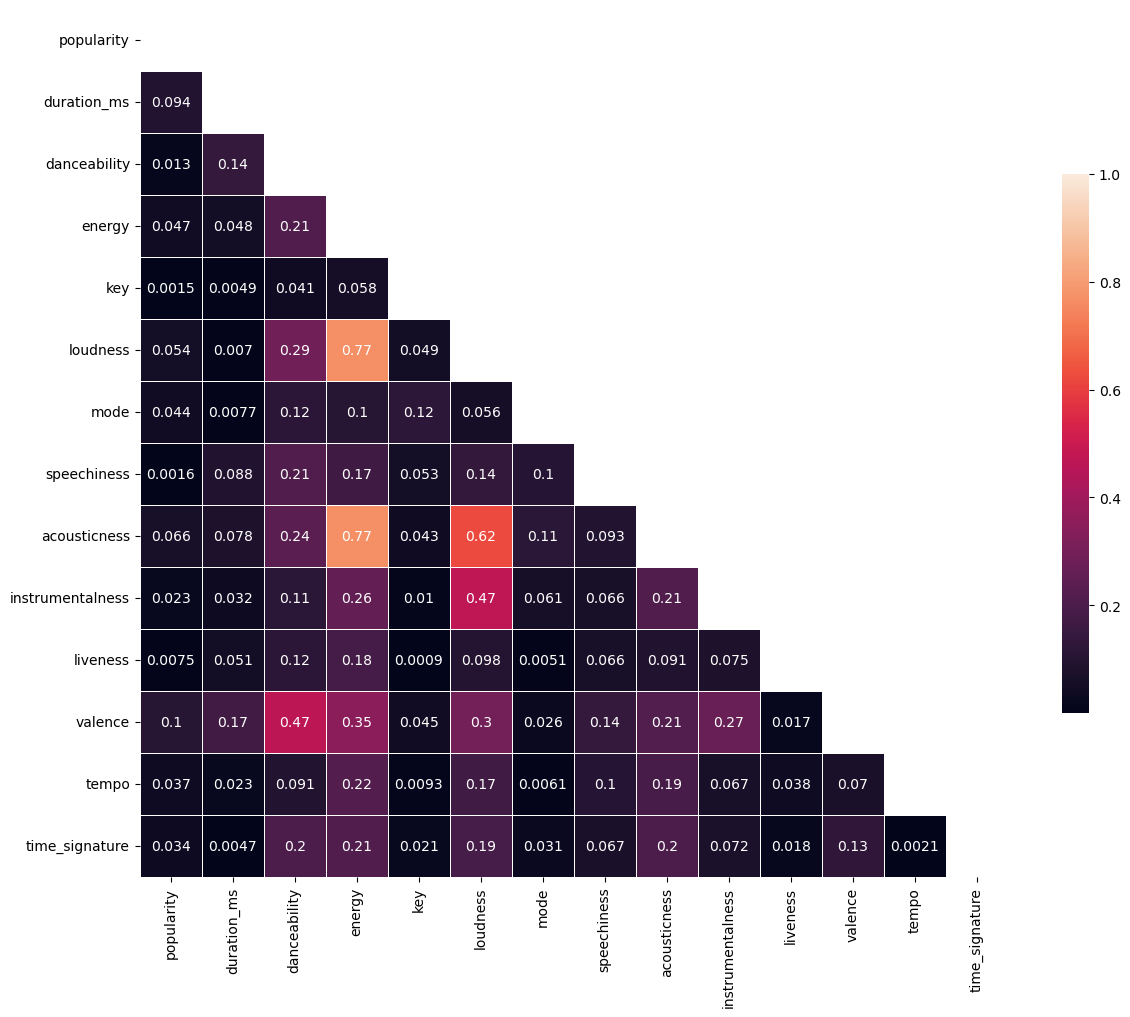

In [196]:
numeric_df = audio_features.select_dtypes(include=["int64", "float64"])

corr=np.abs(numeric_df.corr())

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(14, 14))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

In [ ]:
# No high correlation between the numerical features, so no need to drop...
# Changed my mind: energy and loudness, worth trialling dropping loudness
# Energy acousticness

In [ ]:
# Drop key, explicit, time_signature, energy and loudness highly correlated so drop loudness.

# Split into numerical and object features

In [ ]:
# Columns:
# IDs / Metadata: track_id, track_name, album_name, artists → identifiers, not useful for clustering.
# Categorical: explicit (boolean), mode, key, time_signature.
# Numerical (features): danceability, energy, loudness, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms.
# Popularity: business-related, could be used separately (e.g., for “trending” filter), but not for clustering audio similarity.

In [ ]:
'track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature'

In [213]:
# "key" needs to be in categorical and not numerical

numerical_cols = ['popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
    'key', 'loudness', 'mode', 'speechiness', 'acousticness',
    'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']

categorical_cols = ['track_id', 'artists', 'album_name', 'track_name']

numerical_df = X[numerical_cols]
categorical_df = X[categorical_cols]

In [214]:
numerical_df

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,73,230666,False,0.676,0.461,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4
1,55,149610,False,0.420,0.166,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4
2,57,210826,False,0.438,0.359,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4
4,82,198853,False,0.618,0.443,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4
5,58,214240,False,0.688,0.481,6,-8.807,1,0.1050,0.2890,0.000000,0.1890,0.666,98.017,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42992,38,312566,False,0.475,0.860,10,-4.722,1,0.0421,0.0065,0.000002,0.2460,0.427,113.949,4
42996,22,385000,False,0.174,0.117,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.035,85.239,4
42997,22,271466,False,0.629,0.329,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.743,132.378,4
42998,41,283893,False,0.587,0.506,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.413,135.960,4


In [215]:
categorical_df

,track_id,artists,album_name,track_name
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On
5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember
...,...,...,...,...
42992,3FjOBB4EyIXHYUtSgrIdY9,Jesus Culture,Revelation Songs,Your Love Never Fails
42996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light
42997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado
42998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends


# MinMaxScaler

In [ ]:
# MinMaxScaler gave better silhouette score compared to standard scaler for Nur, so can stick wtih this
# Scale and Fit only the numerical features

In [400]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [401]:
minmax = MinMaxScaler()

In [402]:
minmax.fit(numerical_df)
numerical_df_scaled = minmax.transform(numerical_df)

In [399]:
# numerical_df_scaled = pd.DataFrame(numerical_df_scaled, columns=numerical_df.columns)

# Standard Scaler

In [ ]:
# worse silhouette score though

# Get the Best Number of Clusters through Elbow Method and Silhouette Score

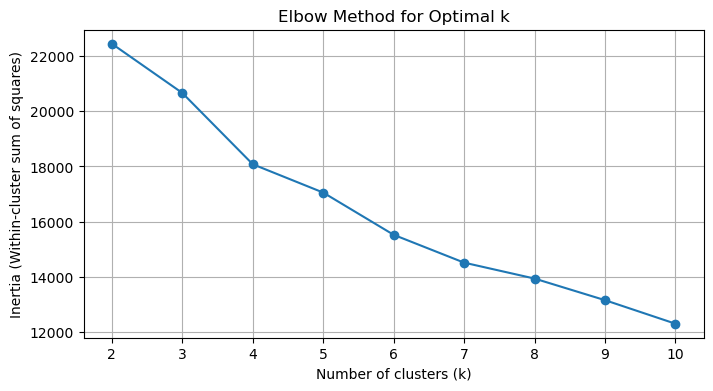

In [403]:
inertias = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(numerical_df_scaled)
    inertias.append(kmeans.inertia_)


plt.figure(figsize=(8, 4))
plt.plot(k_range, inertias, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Within-cluster sum of squares)')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_range)
plt.grid(True)

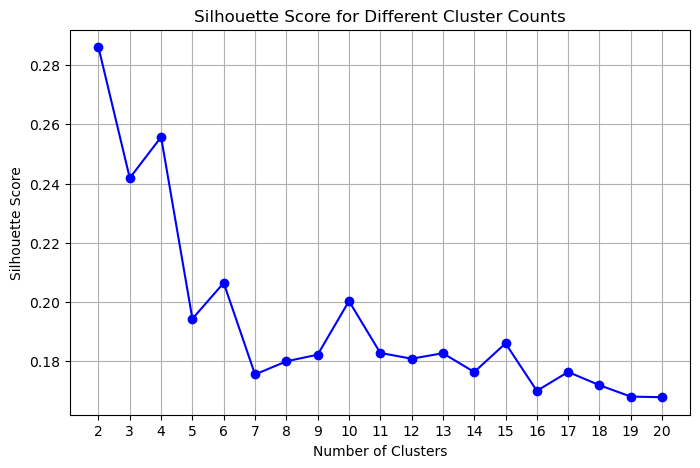

In [239]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pickle
import os

cluster_range = range(2, 21)
silhouette_scores = []



for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init = 5)
    cluster_labels = kmeans.fit_predict(numerical_df_scaled)
    score = silhouette_score(numerical_df_scaled, cluster_labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='-', color='b')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Different Cluster Counts")
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

# Predict Clusters using K = 6 and Create "Labels" Column

In [404]:
kmeans_spotify = KMeans(n_clusters=6, random_state=42, n_init=10)
kmeans_spotify.fit(numerical_df_scaled)

KMeans(n_clusters=6, n_init=10, random_state=42)

In [405]:
labels = kmeans_spotify.predict(numerical_df_scaled)

In [407]:
labels

array([0, 1, 1, ..., 5, 1, 5], dtype=int32)

In [406]:
kmeans_spotify.labels_

array([0, 1, 1, ..., 5, 1, 5], dtype=int32)

# Add "Label" Column to the Original Numerical_df

In [409]:
numerical_df["cluster"] = kmeans_spotify.labels_

/var/folders/t7/2831gjdd1sj_3_zl1rly62n00000gn/T/ipykernel_64733/944077509.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_df["cluster"] = kmeans_spotify.labels_


In [410]:
numerical_df.sample()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,cluster
22015,1,197995,False,0.503,0.849,5,-2.709,1,0.0615,0.00428,0.0,0.0667,0.762,165.096,4,2


In [411]:
numerical_df.groupby("cluster").mean()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
cluster,,,,,,,,,,,,,,,
0,37.277075,230580.382628,0.000000,0.612556,0.756495,3.059923,-5.921112,0.000000,0.076677,0.125040,0.018800,0.208481,0.540483,122.619682,4.0
1,33.309328,227670.331447,0.001029,0.505319,0.346146,4.796982,-12.066662,0.985597,0.050360,0.744442,0.190740,0.169293,0.352522,111.684817,4.0
2,34.867060,240964.733839,0.000000,0.541177,0.742510,5.488336,-6.144163,1.000000,0.067154,0.110879,0.018096,0.243708,0.449753,127.095609,4.0
3,39.373742,208407.731930,1.000000,0.680419,0.708112,5.445563,-5.964163,0.564044,0.134867,0.171375,0.020002,0.200538,0.515587,124.701188,4.0
4,37.052852,234889.308725,0.000000,0.649526,0.744675,4.610738,-6.653472,1.000000,0.068831,0.152794,0.175803,0.175616,0.639365,123.702257,4.0
5,38.157027,235658.196206,0.000000,0.597650,0.640495,7.605721,-8.221121,0.000000,0.075569,0.300306,0.238581,0.192385,0.465215,120.489598,4.0


# Join Original Numerical and Categorical DF

In [412]:
whole_df = pd.concat(
    [categorical_df.reset_index(drop=True), numerical_df.reset_index(drop=True)],
    axis=1
)

In [413]:
# overwrite with correct labels (6)
whole_df["cluster"] = labels 

In [414]:
whole_df

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,cluster
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.461,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,0
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.166,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,1
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.359,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,1
3,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.443,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,1
4,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240,False,0.688,0.481,6,-8.807,1,0.1050,0.2890,0.000000,0.1890,0.666,98.017,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31159,3FjOBB4EyIXHYUtSgrIdY9,Jesus Culture,Revelation Songs,Your Love Never Fails,38,312566,False,0.475,0.860,10,-4.722,1,0.0421,0.0065,0.000002,0.2460,0.427,113.949,4,2
31160,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.117,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.035,85.239,4,1
31161,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.329,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.743,132.378,4,5
31162,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.506,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.413,135.960,4,1


# Check what each Cluster Refers to by Listening to Some Songs

In [ ]:
# Listen to each Cluster's Songs or Get the mean of each Cluster and input to ChatGPT for suggestions
# change cluster numbers to label names
# mean audio features = chatgpt
# recommend songs function , else part: prompt a question what type of music do you want to listen to? Filter the df, 

In [420]:
# Picks and plays a random song from a chosen cluster.
# whole_df DataFrame with 'cluster', 'track_name', and 'artists' columns
# cluster_no is an int, cluster number to sample from

def recommend_cluster_song(whole_df, cluster_no):
    
    # Filter songs from the chosen cluster
    cluster_df = whole_df[whole_df["cluster"] == cluster_no]
    
    if cluster_df.empty:
        print(f"No songs found for cluster {cluster_no}")
        return None
    
    # Pick a random row
    song_row = cluster_df.sample(1).iloc[0]
    song = song_row["track_name"]
    artist = song_row["artists"]
    
    print(f"Random pick from cluster {cluster_no}: {song} — {artist}")
    
    # Search on Spotify
    results = sp.search(q=f"{song} {artist}", type="track", limit=1, market="GB")
    if results["tracks"]["items"]:
        track_id = results["tracks"]["items"][0]["id"]
        display(play_song(track_id))
    else:
        print("Could not find this song on Spotify")


In [477]:
recommend_cluster_song(whole_df, 2)

Random pick from cluster 2: Yo Caníbal — OConnor


In [490]:
# Cluster Mapping after Listening to a few Songs:
# 0: Easy Listening / Reggaeton / High Energy
# 1: Instrumental / Lofi / Christmas
# 2: Chilled Mellow Vocal / Old Classics / Christmas
# 3: International Upbeat
# 4: Live / Guitar bands
# 5: Heavy Metal Rock / Electronic House / Christmas

# ChatGPT's suggestions for cluster_labels = {
    # 0: "Energetic Dance-Pop",
    # 1: "Chilled Acoustic Ballads",
    # 2: "Upbeat Pop/Rock",
    # 3: "Funky Danceable Pop",
    # 4: "Happy Party Pop",
    # 5: "Instrumental / Lo-fi"}

cluster_labels = {
    0: "Energetic Dance-Pop",
    1: "Chilled Acoustic Ballads",
    2: "Upbeat Pop/Rock",
    3: "Funky Danceable Pop",
    4: "Happy Party Pop",
    5: "Relaxed Instrumental / Lo-fi"
}


In [491]:
cluster_labels

{0: 'Energetic Dance-Pop',
 1: 'Chilled Acoustic Ballads',
 2: 'Upbeat Pop/Rock',
 3: 'Funky Danceable Pop',
 4: 'Happy Party Pop',
 5: 'Relaxed Instrumental / Lo-fi'}

In [417]:
whole_df["cluster"].nunique()

6

In [418]:
whole_df["cluster"].unique()

array([0, 1, 4, 2, 5, 3], dtype=int32)

<Axes: xlabel='cluster'>

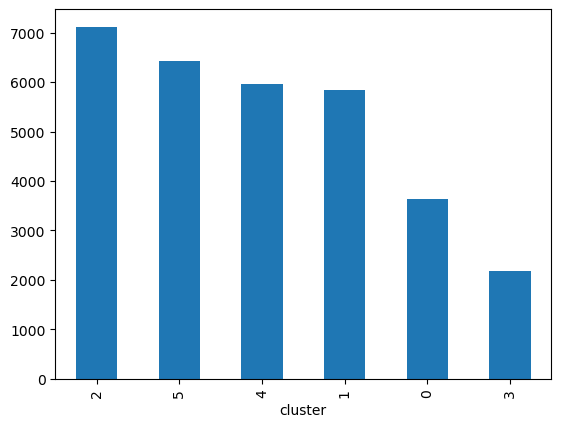

In [494]:
cluster_count = whole_df["cluster"].value_counts().sort_values(ascending=False)
cluster_count.plot(kind="bar")

In [484]:
cluster_means = whole_df.groupby("cluster").mean(numeric_only=True).round(2)
cluster_means

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
cluster,,,,,,,,,,,,,,,
0,37.28,230580.38,0.0,0.61,0.76,3.06,-5.92,0.00,0.08,0.13,0.02,0.21,0.54,122.62,4.0
1,33.31,227670.33,0.0,0.51,0.35,4.80,-12.07,0.99,0.05,0.74,0.19,0.17,0.35,111.68,4.0
2,34.87,240964.73,0.0,0.54,0.74,5.49,-6.14,1.00,0.07,0.11,0.02,0.24,0.45,127.10,4.0
3,39.37,208407.73,1.0,0.68,0.71,5.45,-5.96,0.56,0.13,0.17,0.02,0.20,0.52,124.70,4.0
4,37.05,234889.31,0.0,0.65,0.74,4.61,-6.65,1.00,0.07,0.15,0.18,0.18,0.64,123.70,4.0
5,38.16,235658.20,0.0,0.60,0.64,7.61,-8.22,0.00,0.08,0.30,0.24,0.19,0.47,120.49,4.0


In [492]:
whole_df["cluster_label"] = whole_df["cluster"].map(cluster_labels)

In [493]:
whole_df

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,cluster,cluster_label
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.461,1,...,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,0,Energetic Dance-Pop
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.166,1,...,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,1,Chilled Acoustic Ballads
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.359,0,...,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,1,Chilled Acoustic Ballads
3,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.443,2,...,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,1,Chilled Acoustic Ballads
4,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240,False,0.688,0.481,6,...,1,0.1050,0.2890,0.000000,0.1890,0.666,98.017,4,4,Happy Party Pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31159,3FjOBB4EyIXHYUtSgrIdY9,Jesus Culture,Revelation Songs,Your Love Never Fails,38,312566,False,0.475,0.860,10,...,1,0.0421,0.0065,0.000002,0.2460,0.427,113.949,4,2,Upbeat Pop/Rock
31160,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.117,0,...,0,0.0401,0.9940,0.976000,0.1050,0.035,85.239,4,1,Chilled Acoustic Ballads
31161,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.329,0,...,0,0.0420,0.8670,0.000000,0.0839,0.743,132.378,4,5,Relaxed Instrumental / Lo-fi
31162,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.506,7,...,1,0.0297,0.3810,0.000000,0.2700,0.413,135.960,4,1,Chilled Acoustic Ballads


# Continue Working on the Program

In [524]:
def recommend_song():  
    song_choice = input("Do you want a trending song? Please enter yes or no")
    if song_choice.lower() == "yes":
        recommendation = random.choice(billboard_hot_100_df.index)
        song = billboard_hot_100_df.loc[recommendation, 'song_title']
        artist = billboard_hot_100_df.loc[recommendation, 'artist']
        results=sp.search(q=song,type ="track",limit=5,market="GB")
        track_id = results["tracks"]["items"][0]["id"] 
        print("your trending song is: " ,song)
        print("your trending artist is: " ,artist)
        return(play_song(track_id))

# for the next else part, do a loop where it goes through each cluster/label and plays a sample from that song    
    
    else:
        # Ask the user which cluster label they want to listen to
        cluster_labels = {
        0: "Energetic Dance-Pop",
        1: "Chilled Acoustic Ballads",
        2: "Upbeat Pop/Rock",
        3: "Funky Danceable Pop",
        4: "Happy Party Pop",
        5: "Relaxed Instrumental / Lo-fi"}

        print("Available music types:")
        for lbl in cluster_labels.values():
            print("-", lbl)

        user_choice = input("What type of music do you want to listen to")
        # Find which cluster number matches that label
        cluster_no= None
        for no, lbl in cluster_labels.items():
            if user_choice.lower() in lbl.lower():
                cluster_no = no
                break

        if cluster_no is None:
            print("Sorry, that choice is not available.")
            return None

        # Filter songs from chosen cluster
        cluster_songs = whole_df[whole_df["cluster"] == cluster_no]

        # Play 3 random songs
        sample = cluster_songs.sample(3) 
        print(f"songs from cluster {lbl}:") 
        for id in sample["track_id"]: 
            display(play_song(id)) 
            

In [531]:
recommend_song()

Do you want a trending song? Please enter yes or no no


Available music types:
- Energetic Dance-Pop
- Chilled Acoustic Ballads
- Upbeat Pop/Rock
- Funky Danceable Pop
- Happy Party Pop
- Relaxed Instrumental / Lo-fi


What type of music do you want to listen to pup


Sorry, that choice is not available.


In [502]:
print("Available music types:")
for lbl in cluster_labels.values():
            print("-", lbl)

Available music types:
- Energetic Dance-Pop
- Chilled Acoustic Ballads
- Upbeat Pop/Rock
- Funky Danceable Pop
- Happy Party Pop
- Relaxed Instrumental / Lo-fi


# Streamlit

In [ ]:
# Kmeans documentation n_init, number of times the kmeans algorithm is run with different centroid seeds, to get the best possible start 
# To increase the quality of clusters
# kmeans++ - default is 1, so can increase initialise it to 3 or 5
# Benefit of just having 1: for each K, just training 1 model, so saves time

# Takeaways / Next Steps / Improvements

I included key, mode, and time_signature as numerical features. I later discovered that these features are actually categorical in nature 
and may not improve clustering quality, but I prioritized consistency and continuing with finishing the project at this stage. 
A next step would be to test removing them and compare silhouette scores / quality of the clusters.